# Imports and auxiliary functions

In [77]:
# imports

import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [78]:
# activation functions

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def perceptron(z):
    return -1 if z<=0 else 1

# loss functions

def ploss(yhat, y):
    return max(0, -yhat*y)

def lrloss(yhat, y):
    return 0.0 if yhat==y else -1.0*(y*np.log(yhat)+(1-y)*np.log(1-yhat))

# prediction functions

def ppredict(self, x):
    return self(x)

def lrpredict(self, x):
    return 1 if self(x)>0.5 else 0

# extra

def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

# Neuron and Trainer class definitions

In [79]:
class Neuron:

    def __init__(self, dimension=1, weights=None, bias=None, activation=(lambda x: x), predict=(lambda x: x)):
    
        self._dim = dimension
        self.w = weights or np.random.normal(size=self._dim)
        self.w = np.array(self.w)
        self.b = bias if bias is not None else np.random.normal()
        self._a = activation
        self.predict = predict.__get__(self)
    
    def __str__(self):
        
        return "Simple cell neuron\n\
        \tInput dimension: %d\n\
        \tBias: %f\n\
        \tWeights: %s\n\
        \tActivation: %s" % (self._dim, self.b, self.w, self._a.__name__)
    
    def __call__(self, x):
        
        yhat = self._a(np.dot(self.w, np.array(x)) + self.b)
        return yhat

In [80]:
class Trainer:
    
    def __init__(self, dataset, model):
        
        self.dataset = dataset
        self.model = model
        self.loss = ploss
        
    def cost(self, data):
        
        return np.mean([self.loss(self.model.predict(x), y) for x, y in data])
    
    def accuracy(self, data):
        
        return 100*np.mean([1 if self.model.predict(x) == y else 0 for x, y in data])
    
    def train(self, lr, ne):
        
        print("training model on data...")
        accuracy = self.accuracy(self.dataset)
        print("initial accuracy: %.3f" % (accuracy))
        
        for epoch in range(ne):
            for d in self.dataset:
                x, y = d
                x = np.array(x)
                yhat = self.model(x)
                error = y - yhat
                self.model.w += lr*(y-yhat)*x
                self.model.b += lr*(y-yhat)
            accuracy = self.accuracy(self.dataset)
            print('>epoch=%d, learning_rate=%.3f, accuracy=%.3f' % (epoch+1, lr, accuracy))
            
        print("training complete")
        print("final accuracy: %.3f" % (self.accuracy(self.dataset)))

# Generating a toy dataset of two clusters of points (red and blue, labaled with -1 and 1 correspondingly)

In [81]:
group1 = np.random.multivariate_normal(mean=[5, 5], cov=[[3, 0], [0, 3]], size=25)
group2 = np.random.multivariate_normal(mean=[15, 15], cov=[[3, 0], [0, 3]], size=25)

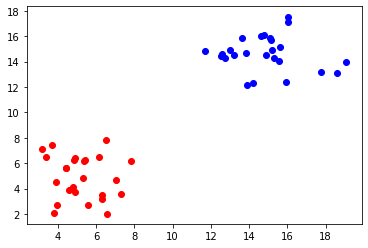

In [82]:
plt.scatter([x for x, y in group1], [y for x, y in group1], color='r')
plt.scatter([x for x, y in group2], [y for x, y in group2], color='b')

In [83]:
data = [(list(d), -1) for d in group1]+[(list(d), 1) for d in group2]
random.shuffle(data)

In [84]:
data

[([15.192753328870602, 14.94557501262072], 1),
 ([5.395569122310987, 6.2200223930608844], -1),
 ([4.86270923835623, 6.267574005468623], -1),
 ([12.530938068278058, 14.43120440072513], 1),
 ([7.057648955682438, 4.706603933217228], -1),
 ([6.595834704901922, 2.019285833497471], -1),
 ([12.765336981372865, 14.29484254674243], 1),
 ([15.561322952793981, 14.067119738799251], 1),
 ([13.231750654531833, 14.526677522810822], 1),
 ([19.05118486954804, 13.985703541183913], 1),
 ([6.299903997446164, 3.50460053687811], -1),
 ([3.188829056320075, 7.118865613580336], -1),
 ([4.898290567394563, 6.399303410710895], -1),
 ([6.4960488693038005, 7.837036360207694], -1),
 ([4.419792664422703, 5.613190441830282], -1),
 ([14.613042403492315, 16.036440246162755], 1),
 ([3.8075579140287585, 2.101771257478538], -1),
 ([16.05556720536131, 17.101242558584758], 1),
 ([12.582652295201662, 14.63224734472291], 1),
 ([15.123739807523833, 15.703660492474873], 1),
 ([5.291448691319398, 4.856494615527115], -1),
 ([7.280

# Some visualization (you won't be doing this because your datasets will be high-dimensional)

In [85]:
# we use this to visualize the decision boundary before and after training

def draw_decision_boundary(dataset, model):
    
    weights = [model.b] + list(model.w)
    dataset = [d[0]+[d[1]] for d in dataset]
    plt.scatter([d[0] for d in dataset if d[2] == -1], [d[1] for d in dataset if d[2] == -1], c='red')
    plt.scatter([d[0] for d in dataset if d[2] == 1], [d[1] for d in dataset if d[2] == 1], c='blue')
    xmin, xmax = min([d[0] for d in dataset]), max([d[0] for d in dataset])
    ymin, ymax = min([d[1] for d in dataset]), max([d[1] for d in dataset])
    xscale = 1.25
    yscale = 1.25
    xs = np.linspace(xmin, xmax, 100)
    plt.plot(xs, [-weights[0]/weights[2] - weights[1]/weights[2]*x for x in xs], c='black')
    axes = plt.gca()
    axes.set_xlim([((xmin+xmax)-(xmax-xmin)*xscale)/2.0, ((xmin+xmax)+(xmax-xmin)*xscale)/2.0])
    axes.set_ylim([((ymin+ymax)-(ymax-ymin)*yscale)/2.0, ((ymin+ymax)+(ymax-ymin)*yscale)/2.0])
    plt.show()

# Initialize a neuron

In [86]:
model = Neuron(dimension=2, activation=perceptron, predict=ppredict)

In [87]:
print(model)

Simple cell neuron
        	Input dimension: 2
        	Bias: -0.147795
        	Weights: [-0.19342504  1.20758688]
        	Activation: perceptron


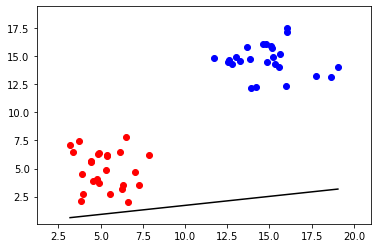

In [88]:
# initial boundary

draw_decision_boundary(data, model)

In [89]:
trainer = Trainer(data, model)

In [90]:
trainer.accuracy(data)

50.0

# Train the model

In [91]:
trainer.train(0.01, 25)

training model on data...
initial accuracy: 50.000
>epoch=1, learning_rate=0.010, accuracy=66.000
>epoch=2, learning_rate=0.010, accuracy=72.000
>epoch=3, learning_rate=0.010, accuracy=62.000
>epoch=4, learning_rate=0.010, accuracy=88.000
>epoch=5, learning_rate=0.010, accuracy=90.000
>epoch=6, learning_rate=0.010, accuracy=94.000
>epoch=7, learning_rate=0.010, accuracy=94.000
>epoch=8, learning_rate=0.010, accuracy=64.000
>epoch=9, learning_rate=0.010, accuracy=96.000
>epoch=10, learning_rate=0.010, accuracy=54.000
>epoch=11, learning_rate=0.010, accuracy=68.000
>epoch=12, learning_rate=0.010, accuracy=100.000
>epoch=13, learning_rate=0.010, accuracy=100.000
>epoch=14, learning_rate=0.010, accuracy=100.000
>epoch=15, learning_rate=0.010, accuracy=100.000
>epoch=16, learning_rate=0.010, accuracy=100.000
>epoch=17, learning_rate=0.010, accuracy=100.000
>epoch=18, learning_rate=0.010, accuracy=100.000
>epoch=19, learning_rate=0.010, accuracy=100.000
>epoch=20, learning_rate=0.010, accura

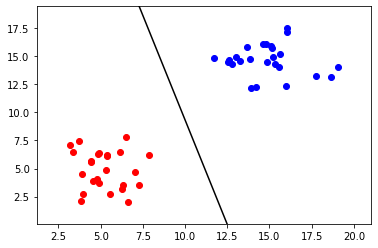

In [92]:
# final boundary

draw_decision_boundary(data, model)